![](https://img.kaikeba.com/web/kkb_index/img_index_logo.png)

# 人工智能基础课机器学习 第三节课作业 线性回归

同学们大家好，本次作业是考察学生对线性回归的理解与SKLearn的使用，以及pandas的使用。

本次作业的数据集：data.csv
这份数据代表了一个循环发电厂，每个数据有5列，分别是:AT（温度）, V（压力）, AP（湿度）, RH（压强）, PE（输出电力)

问题是得到一个线性的关系，对应PE是样本输出，而AT/V/AP/RH这4个是样本特征， 机器学习的目的就是得到一个线性回归模型，即: PE=W0+W1∗AT+W2∗V+W3∗AP+W4∗RH 而需要学习的，就是W0,W1,W2,W3,W4这5个参数。


In [34]:
#导入库
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 第一步：读取样本数据，并将数据集分为训练集和测试集




In [25]:
#读取数据
data=pd.read_csv('data/data.csv')
#提取样本特征
x=data[['AT','V','AP','RH']]
#PE为样本输出
y=data[['PE']]
#将数据集分为训练集和测试集，训练集占80%，测试集占20%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
#查看维度
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 4)
(1914, 4)
(7654, 1)
(1914, 1)


#  第二步：训练Linear Regreesion模型，得到训练参数



In [27]:
#训练模型
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.intercept_)
print(lr.coef_)

[449.531627]
[[-1.98040067 -0.23249053  0.06705059 -0.15737393]]


# 第三步：使用均方误差和均方根误差在测试集上的表现来评价模型的好坏。



In [28]:
#预测值
y_pred = lr.predict(x_test)
# 均方误差
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
# 均方根误差
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 20.218249777037908
RMSE: 4.4964708135423175


# 第四步：可视化的方式直观的表示模型学习效果的好坏



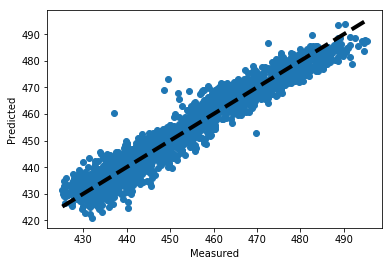

In [40]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
#'k--':k指线为黑色，--是线的形状。lw指定线宽
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()